In [1]:
#All codes are available at https://github.com/MyDataCafe/
#All Class Videos are at https://www.youtube.com/mydatacafe
#We are on Facebook https://www.facebook.com/mydatacafe/
#We are on LinkedIn https://www.linkedin.com/company/mydatacafe/

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Lab Exercise - Honey Production

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Context
    
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component to American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. Twelve years later, some industries are observing recovery but the American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America by state from 1998 to 2012.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Content
    
The National Agricultural Statistics Service (NASS) is the primary data reporting body for the US Department of Agriculture (USDA). NASS's mission is to "provide timely, accurate, and useful statistics in service to U.S. agriculture". From datasets to census surveys, their data covers virtually all aspects of U.S. agriculture. Honey production is one of the datasets offered. Click here for the original page containing the data along with related datasets such as Honey Bee Colonies and Cost of Pollination. Data wrangling was performed in order to clean the dataset. honeyproduction.csv is the final tidy dataset suitable for analysis. The three other datasets (which include "honeyraw" in the title) are the original raw data downloaded from the site. They are uploaded to this page along with the "Wrangling The Honey Production Dataset" kernel as an example to show users how data can be wrangled into a cleaner format. Useful metadata on certain variables of the honeyproduction dataset is provided below:

  - numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year
  - yieldpercol: Honey yield per colony. Unit is pounds
  - totalprod: Total production (numcol x yieldpercol). Unit is pounds
  - stocks: Refers to stocks held by producers. Unit is pounds
  - priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.
  - prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
  - Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Acknowledgements

Honey production data was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture.





<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 1
    
**Import pandas, numpy, seaborn packages under the appropriate aliases as you seem fit if necessary.** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 2
    
**Import the honeyproduction.csv file**

In [ ]:
mydata = pd.read_csv("honeyproduction.csv")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 3
    
**Check first five observations of the data, basic measures of descriptive statistics and the information about the various data types of each variable in the data. Also, check whether there are null values present in the data.** (1 Marks)

In [4]:
mydata.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [7]:
mydata.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 4
    
 **How many States are included in the dataset?** (0.5 Marks)

In [8]:
mydata['state'].nunique()

44

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 5
 
 **Which are the States that are included in this dataset?** (0.5 Marks)

In [9]:
mydata['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 6

**Calculate the average production for each state across all years (state wise average production)**(0.5 Marks)

In [12]:
pd.DataFrame(mydata.groupby("state")["totalprod"].mean().round())

,totalprod
state,
AL,825467.0
AR,2810400.0
AZ,2032267.0
CA,23169000.0
CO,1750600.0
FL,16469867.0
GA,3299933.0
HI,843133.0
IA,2080000.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 7
    
 **How many years data is provided in the dataset? Also, what is the earliest year and the latest year present in the data?** (1 Marks)

In [16]:
mydata['year'].nunique()

15

In [17]:
mydata['year'].min()

1998

In [18]:
mydata['year'].max()

2012

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 8

**Which State has seen highest volume in production, and in which year?**(0.5 Marks)

In [19]:
mydata[mydata['totalprod']== mydata['totalprod'].max()][["state","year",'totalprod']]

,state,year,totalprod
532,ND,2010,46410000.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 9
    
__What is the average yield per colony , for each year?__ (0.5 Marks)

In [20]:
mydata[['year', 'yieldpercol']].groupby('year').mean().round()

,yieldpercol
year,
1998,70.0
1999,65.0
2000,68.0
2001,65.0
2002,67.0
2003,63.0
2004,65.0
2005,64.0
2006,62.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 10

**Check the Distribution and the spread of the data along with outliers in "totalprod","stocks" and 'prodvalue'.** (1 Marks)

Hint: use distplot and boxplot

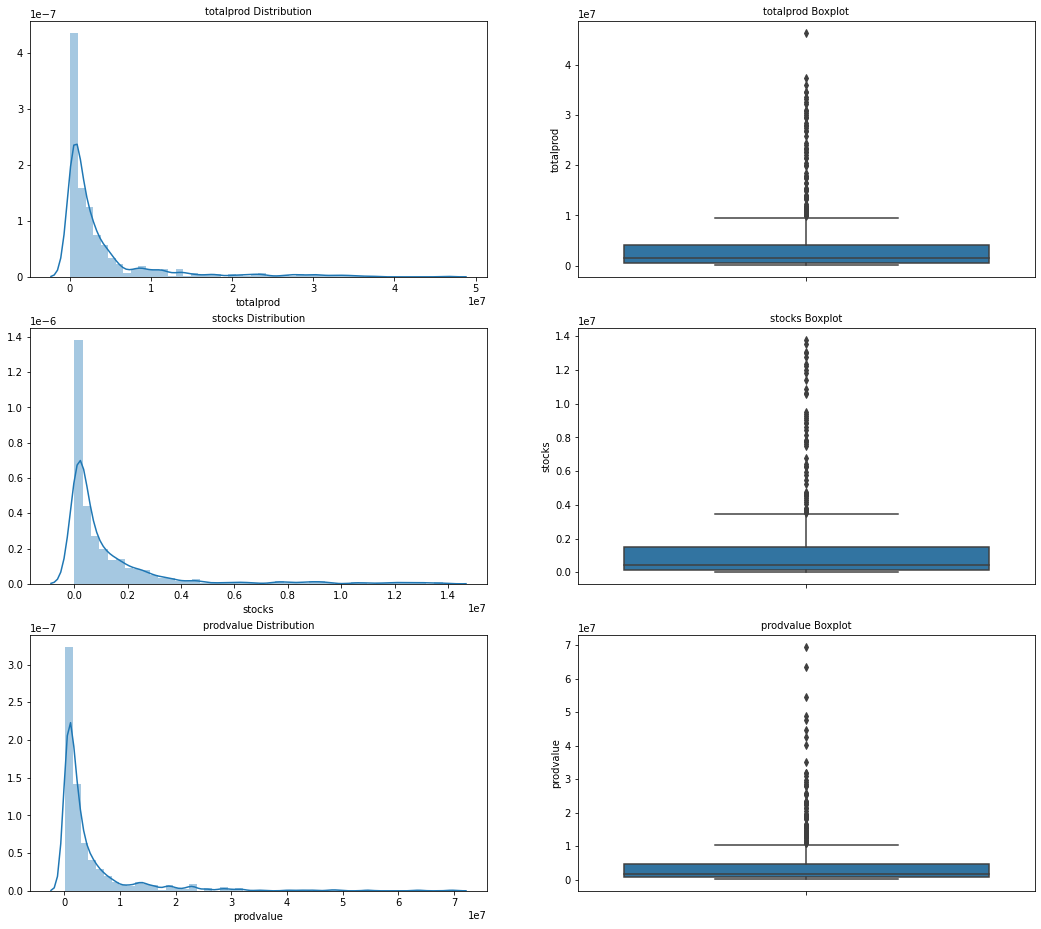

In [34]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(18,16)
a = sns.distplot(mydata['totalprod'] , ax=axes[0][0])
a.set_title("totalprod Distribution",fontsize=10)

a = sns.boxplot(mydata['totalprod'] , orient = "v" , ax=axes[0][1])
a.set_title("totalprod Boxplot",fontsize=10)

a = sns.distplot(mydata['stocks'] , ax=axes[1][0])
a.set_title("stocks Distribution",fontsize=10)

a = sns.boxplot(mydata['stocks'] , orient = "v" , ax=axes[1][1])
a.set_title("stocks Boxplot",fontsize=10)


a = sns.distplot(mydata['prodvalue'] , ax=axes[2][0])
a.set_title("prodvalue Distribution",fontsize=10)

a = sns.boxplot(mydata['prodvalue'] , orient = "v" , ax=axes[2][1])
a.set_title("prodvalue Boxplot",fontsize=10)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 11
    
**Visualize how "priceperlb" and "yieldpercol" have changed with respect to the years** (1 Marks)

Hint: Use boxplot

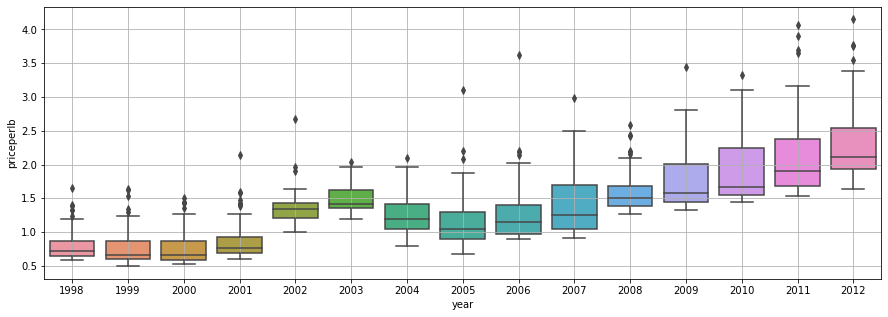

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x=mydata['year'],y=mydata["priceperlb"])
plt.grid()
plt.show()

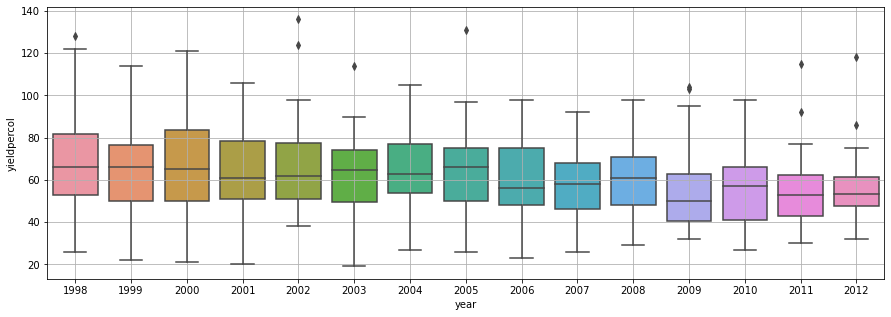

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x=mydata['year'],y=mydata["yieldpercol"])
plt.grid()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 12


**Plot the scatterplots for the numerical variables with each other with the 'year' variable as hue. Ignore the 'state' variable for this analysis.** (1 Marks)

Hint: Use the Pairplot() command within the seaborn graphical subroutine.

In [49]:
plot_var= mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue','year']]
plot_var.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [51]:
plot_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numcol       626 non-null    float64
 1   yieldpercol  626 non-null    int64  
 2   totalprod    626 non-null    float64
 3   stocks       626 non-null    float64
 4   priceperlb   626 non-null    float64
 5   prodvalue    626 non-null    float64
 6   year         626 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 34.4 KB


In [52]:
plot_var['year'] = plot_var['year'].astype('object')
plot_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   numcol       626 non-null    float64
 1   yieldpercol  626 non-null    int64  
 2   totalprod    626 non-null    float64
 3   stocks       626 non-null    float64
 4   priceperlb   626 non-null    float64
 5   prodvalue    626 non-null    float64
 6   year         626 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 34.4+ KB


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


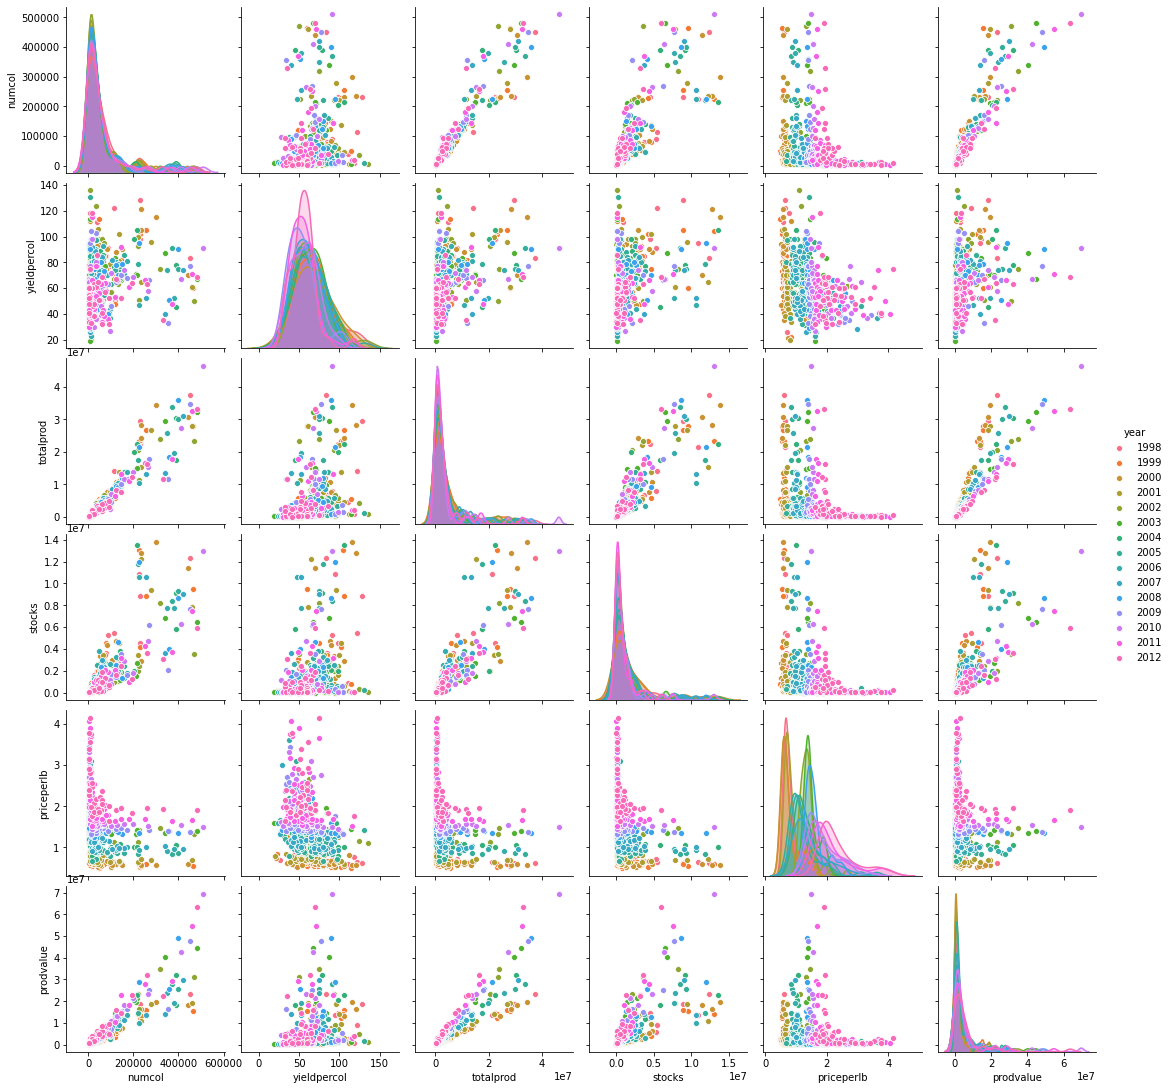

In [53]:
sns.pairplot(plot_var,hue='year')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 13


**Calculate the correlations for the numerical variables. Ignore the 'state' and the 'year' variable for this analysis. Also,plot the correlations as a heatmap.** (1 Marks)

Hint: Use the heatmap() command within the seaborn graphical subroutine.

In [55]:
cor = mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr()
cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


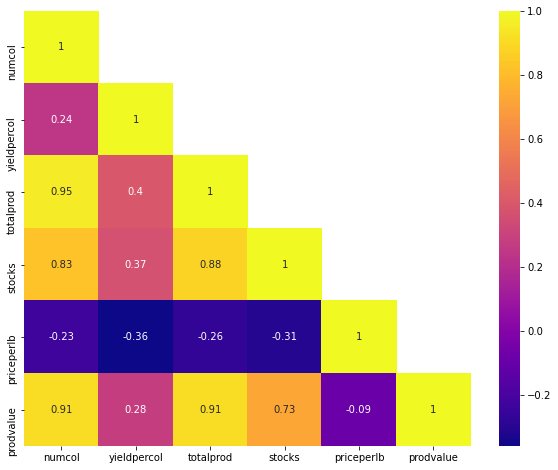

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True, cmap='plasma',mask=np.triu(cor,+1))
plt.show()

numcol and totalprod have the highest correlation (95%)

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 14

**What is the general Production trend from 1998 to 2012? Describe visually.(totalpod)** (0.5 Marks)

Hint: use pointplot()

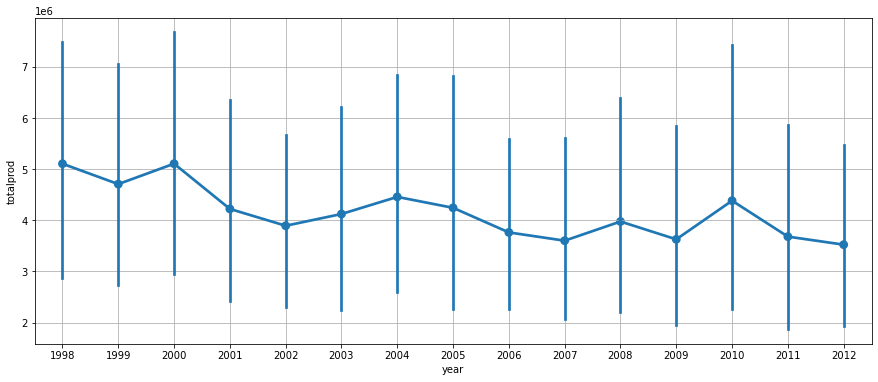

In [59]:
plt.figure(figsize=(15,6))
sns.pointplot(mydata['year'], mydata['totalprod'])
plt.grid()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 15

**Is there a linear relationship between the Number of Colonies & Value in Production? Check at an overall level and year level as well**(1 Marks)

Hint: Use Lmplot()

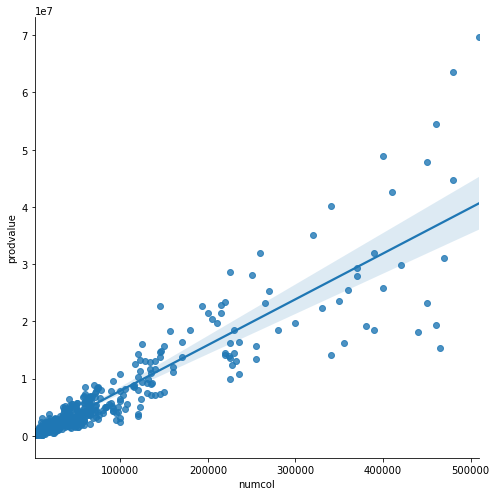

In [67]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata,height=7)
plt.show()

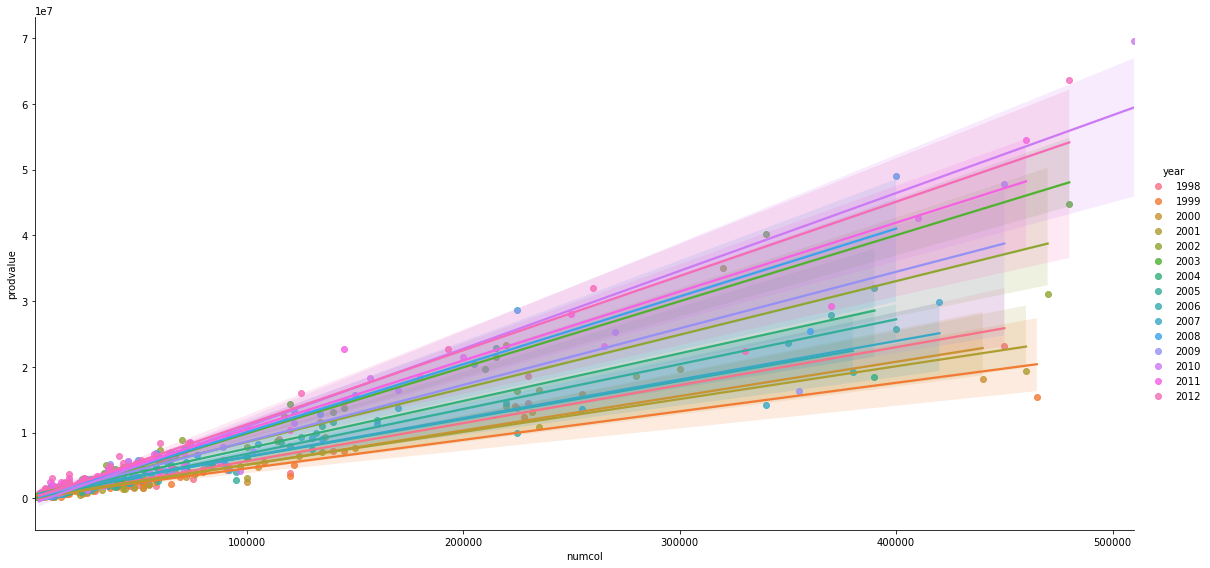

In [68]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='year',height=8,aspect=2)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 16
    
**How has the Value in Production changed over the years?** (Optional Question)

Hint: Use pointplot().

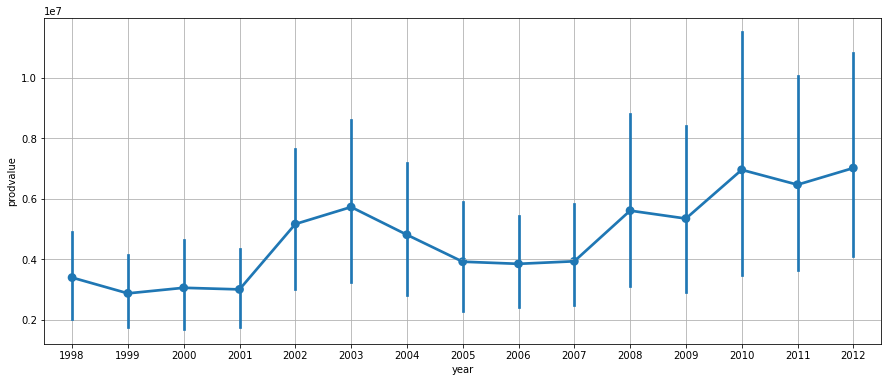

In [70]:
plt.figure(figsize=(15,6))
sns.pointplot(mydata['year'], mydata['prodvalue'])
plt.grid();

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 17
    
**What is the linear relationship between Production volume & value over the years?** (Optional Question)

Hint: Use lmplot() 

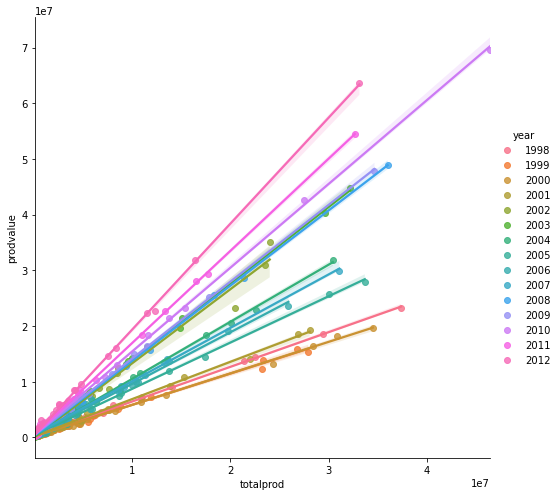

In [71]:
sns.lmplot(x="totalprod", y="prodvalue",hue='year', data=mydata,height=7);

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 18
    
    
**How is the production trend for each State? Describe visually** (Optional Question)

- Hint (Use sns.FacetGrid() & g.map() functions)

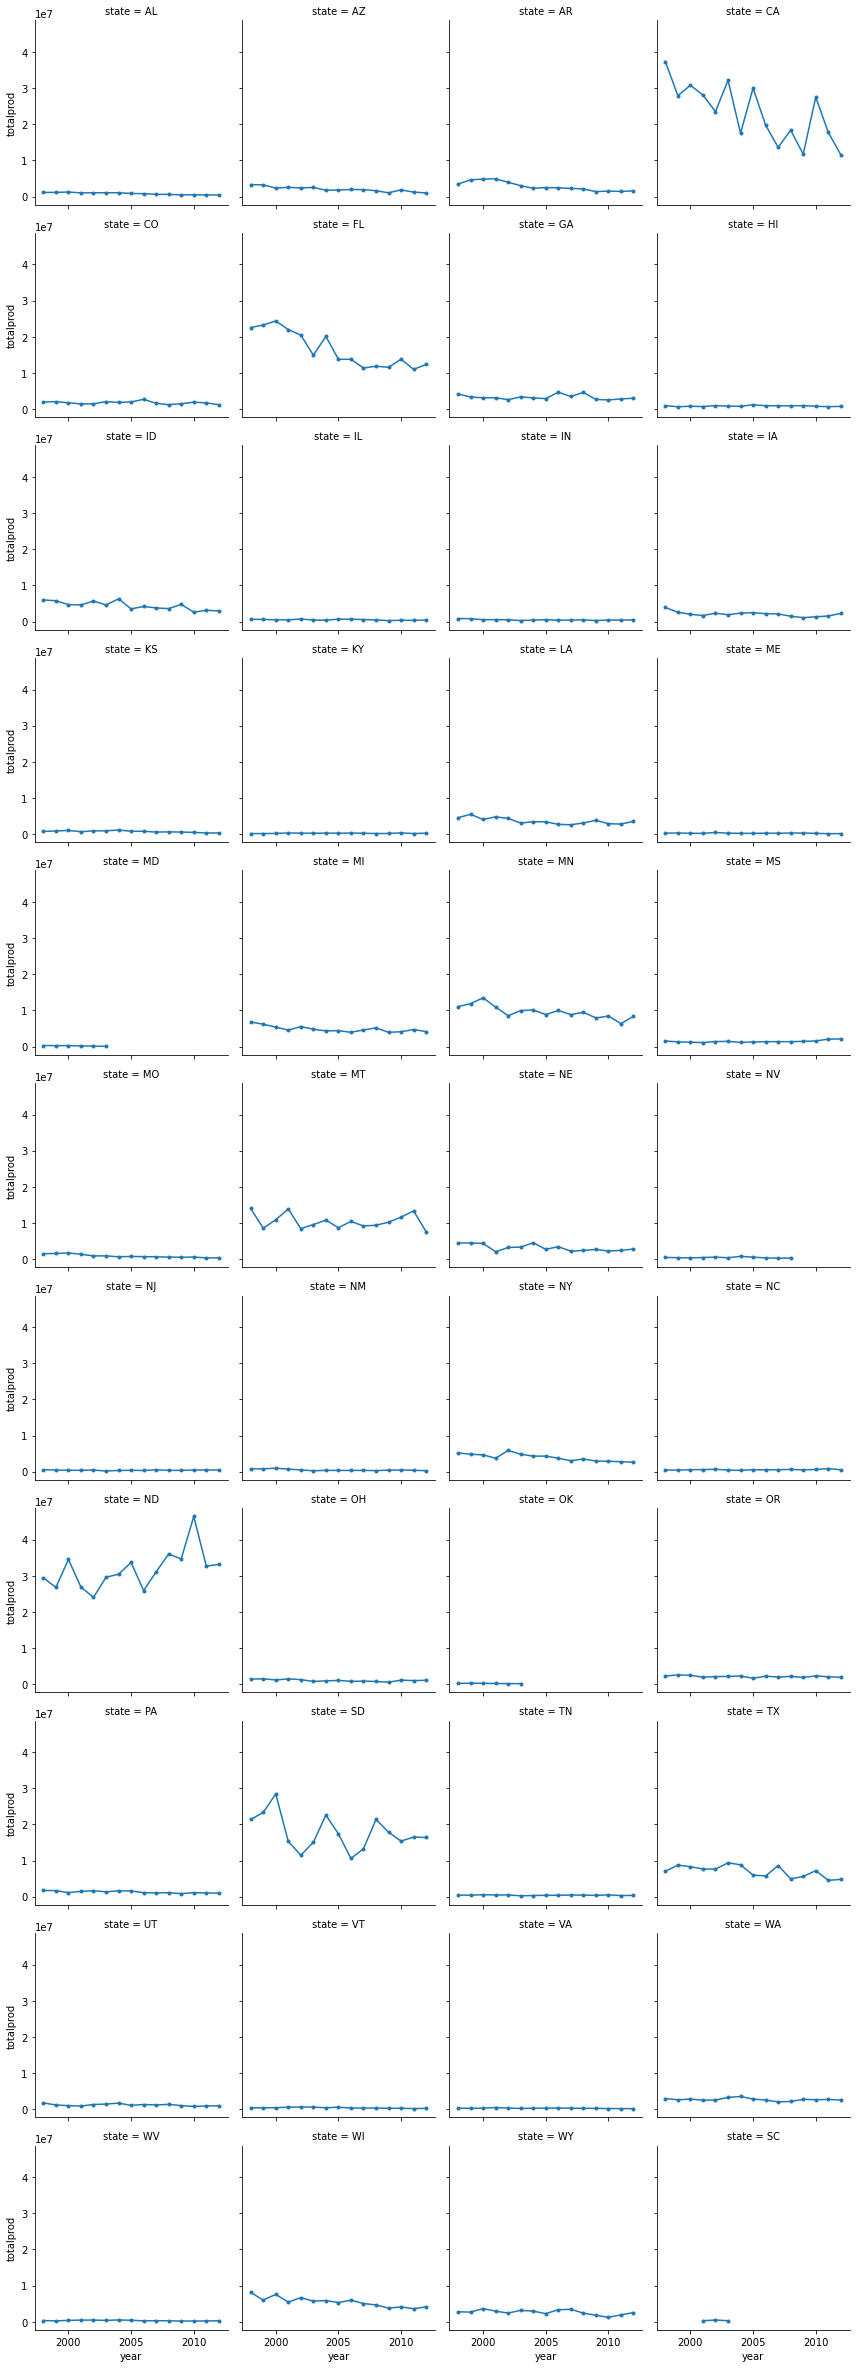

In [64]:
g = sns.FacetGrid(mydata, col="state", col_wrap=4, height=3)
g = g.map(plt.plot, "year", "totalprod", marker=".")
plt.show()

# END

In [2]:
#All codes are available at https://github.com/MyDataCafe/
#All Class Videos are at https://www.youtube.com/mydatacafe
#We are on Facebook https://www.facebook.com/mydatacafe/
#We are on LinkedIn https://www.linkedin.com/company/mydatacafe/